### Natural Language Processing

Natural Language Processing (NLP) is a domain within Computer Science, specifically under the umbrella of Artificial Intelligence (AI). It equips computers with the ability to interpret, understand, and process human language—both text and speech—as naturally as humans do.

At the core of NLP lies a blend of computational linguistics—rules-based modeling of human language—with the dynamic power of statistical methods, machine learning, and deep learning models. This integration allows computers not only to process human language, whether in text or voice form but also to grasp the complete meaning, discerning the intent and sentiment of the speaker or writer.

For our exploration into the world of NLP, we will leverage the capabilities of prominent libraries including:
- **sklearn**
- **nltk**

NLP finds its application in a myriad of real-world scenarios, enhancing and streamlining our interactions and processes. Some notable applications are:
- Machine translation, bridging language barriers across the globe
- Spam detection, safeguarding our inboxes from unwanted emails
- Text summarization, distilling lengthy documents into concise summaries
- Chatbots, providing instant customer support and engagement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import string
# from string import punctuation
# from itertools import chain

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_selection import SelectPercentile, chi2, f_regression, f_classif

# from sklearn import svm
from sklearn.utils import shuffle

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import ngrams

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15236\1256330533.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**CountVectorizer** - Count Vector is a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document.

In [2]:
corpus = ['Apple Orange Orange Apple',\
  'Apple Banana Apple Banana',\
  'Banana Apple Banana Banana Banana Apple',\
  'Banana Orange Banana Banana Orange Banana',\
  'Banana Apple Banana Banana Orange Banana']

print("Using count vectorizer")
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(corpus)
print(pd.DataFrame(tf.A, columns=tf_vectorizer.get_feature_names_out()).to_string())

Using count vectorizer
   apple  banana  orange
0      2       0       2
1      2       2       0
2      2       4       0
3      0       4       2
4      1       4       1


**TfidfVectorizer** - TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.


**Term Frequency (tf)**:
$\[ tf(t) = \text{"Number of times term } t \text{ occurs in a document"} \]$


**Inverse Document Frequency (idf)**:
$\[ idf(t) = \log_e \left( \frac{1 + n}{1 + df(t)} \right) + 1 \]$

Where:
- $\(t\)$ represents the term.
- $\(n\)$ is the total number of documents in the document set.
- $\(df(t)\)$ is the number of documents in the document set that contain the term \(t\).

- Reference: https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/

In [3]:
print("\nUsing tfidf")
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(corpus)
print(pd.DataFrame(tfidf.A, columns=tfidf_vec.get_feature_names_out()).to_string())


Using tfidf
      apple    banana    orange
0  0.643744  0.000000  0.765241
1  0.707107  0.707107  0.000000
2  0.447214  0.894427  0.000000
3  0.000000  0.859622  0.510931
4  0.233043  0.932173  0.277026


### Dataset:
- https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv

In [4]:
df = pd.read_csv('Reviews.csv')

In [5]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.shape

(568454, 10)

- We would like to get an idea of the number of records that are 3 star and lower as well as 3 star and higher.

In [7]:
pos = df[df['Score']>3]
neg = df[df['Score']<3]
print(pos.shape, neg.shape)

(443777, 10) (82037, 10)


In [8]:
pos = pos.head(neg.shape[0])
print(pos.shape, neg.shape)
df = pd.concat([pos,neg])

(82037, 10) (82037, 10)


In [9]:
df = shuffle(df)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
87411,87412,B003TRFU06,A2V9I5Y9NN8KII,Mom in TX,2,2,5,1307232000,Great Pasta,"I'm very gluten intolerant, but my family isn'..."
51053,51054,B001TM711E,A2U1ONLZGH4F0X,Jennifer H. Noll,1,1,5,1244592000,She'd stand on her head for this!,I ordered both this type and the Paella for ou...
8746,8747,B000LKZ84C,AAY43PCKCVONT,f.,3,3,4,1309046400,"Good product, but by the case, date's a little...",Recently purchased a case of Mori-Nu from Amaz...
149601,149602,B000E8WIAS,ANZ02ZWFXYB2E,"Elaine Baly ""ebdotkom""",3,3,1,1324166400,YUKKK!,I had heard so much about this natural sweeten...
40544,40545,B00020HHRW,ABK32ED0M15MR,Christy Funk,1,7,5,1254096000,Horsetail Grass Tea,Too early to know. I was recommended that thi...


### Preprocessing
- Remove all neutral scores and seperate the remaning into positive = 1 and negative = 0.
- Preprocessing ususally involves:
    - Removing additional white spaces
    - Replacing emoji's with a word representation for example :) ==> smile
    - Removing links from the corpus
    - Removing punctuation
    - Removing HTML tags
    - Remove duplicate reviews
    - Here are some good links on how to process and clean text: 
        - https://adataanalyst.com/scikit-learn/countvectorizer-sklearn-example/ and https://machinelearningmastery.com/clean-text-machine-learning-python/

- **For this exercise we will only tokenize reviews, that is change "This is a review" to ['this', 'is', 'a', 'review'].**
- After the text is 'clean' we will use sklearn.

In [10]:
# df = df[df['Score'] !=3]
X = df['Text']

y_map = {1:0, 2:0, 4:1, 5:1}
y = df['Score'].map(y_map)
# y = df['Score'].apply(lambda x: 0 if x < 3 else 1) # another way to do it

In [11]:
X.head(5)

87411     I'm very gluten intolerant, but my family isn'...
51053     I ordered both this type and the Paella for ou...
8746      Recently purchased a case of Mori-Nu from Amaz...
149601    I had heard so much about this natural sweeten...
40544     Too early to know.  I was recommended that thi...
Name: Text, dtype: object

In [12]:
y.head(5)

87411     1
51053     1
8746      1
149601    0
40544     1
Name: Score, dtype: int64

### Classification

Once the text is processed the next step is to do the actual classification. For this exercise we will be using a Logistic Regression Classifier. However there are many other popular classifiers that may perform better:

- Support Vector Machine and its variants
- Naive Bayes and its variants
- Random Forests and its variants

Let's create a function that takes in the training set X , test set y, the model being used model and the classification algorithm clf_model as well as a variable that will show the top coefficients if true coef_show

In [13]:
def text_fit(X, y, model, clf_model, coef_show=1):
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    print ('Model Recall: {}'.format(recall))
    if coef_show == 1: 
        w = model.get_feature_names_out()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

### Classification Experiments

- Logistic regression model on word count
- Logistic regression model on TFIDF
- Logistic regression model on TFIDF + ngram

NGram Definition: N-grams of texts are extensively used in text mining and natural language processing tasks. They are basically a set of co-occuring words within a given window and when computing the n-grams you typically move one word forward (although you can move X words forward in more advanced scenarios). 

[Explanation and Example Here](https://blog.xrds.acm.org/2017/10/introduction-n-grams-need/)

In [14]:
countv = CountVectorizer(stop_words = 'english')
text_fit(X, y, countv, LogisticRegression())

# features: 68923
# train records: 123055
# test records: 41019


C:\msc_data_science_uwi_sta\semester_2_2023_2024\ta\comp6940\playground\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Recall: 0.8981915933528837

-Top 20 positive-
      Word  Coefficient
pleasantly     3.569376
    resist     3.013606
  downside     2.916534
    hooked     2.915432
     penny     2.653530
 addicting     2.600489
       met     2.532258
   worries     2.426782
   welcome     2.393597
 delicious     2.158752
       fav     2.154957
  terrific     2.135119
 alternate     2.092737
 skeptical     2.088887
  drawback     2.025533
     guilt     2.009161
    intend     2.005594
  receives     1.991789
     yummy     1.974622
 excellent     1.961808

-Top 20 negative-
          Word  Coefficient
      inedible    -2.200068
       defeats    -2.313553
        bummer    -2.346077
         lacks    -2.348896
   embarrassed    -2.375942
          hype    -2.415952
    flavorless    -2.422632
disappointment    -2.492156
       assumed    -2.547608
        ripoff    -2.593122
         awful    -2.615954
      terrible    -2.629459
  unacceptable    -2.657243
   disapointed    -2.721252
 disa

In [15]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 68923
# train records: 123055
# test records: 41019
Model Recall: 0.8938905180840665

-Top 20 positive-
      Word  Coefficient
     great    11.615952
 delicious    10.236643
      best     9.731193
   perfect     8.894863
 excellent     8.100994
     loves     7.950041
    highly     7.805116
   amazing     7.461085
      love     7.236389
 wonderful     6.920747
   awesome     6.871651
      good     6.860637
    hooked     6.663553
     yummy     6.334659
  favorite     6.250903
refreshing     5.970476
   pleased     5.932497
      beat     5.812118
pleasantly     5.753546
      nice     5.728702

-Top 20 negative-
          Word  Coefficient
     tasteless    -5.673155
       thought    -5.761292
      thinking    -5.813267
          poor    -5.848232
         threw    -6.069710
        hoping    -6.109772
         sorry    -6.234532
         stale    -6.348121
    disgusting    -6.387291
        return    -6.580119
         bland    -6.667429
          weak    -6.8703

In [16]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2), stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 1932701
# train records: 123055
# test records: 41019
Model Recall: 0.9074780058651026

-Top 20 positive-
            Word  Coefficient
           great    18.086244
       delicious    14.046186
            best    13.702691
         perfect    11.949950
            love    11.581506
           loves    11.109731
       excellent    10.308322
            good     9.889720
       wonderful     9.299718
        favorite     8.859993
         amazing     8.393677
            nice     8.355501
         awesome     7.795227
           happy     7.336743
            easy     7.324044
           yummy     7.122468
          highly     7.093328
         pleased     6.947738
           tasty     6.927480
highly recommend     6.661459

-Top 20 negative-
          Word  Coefficient
         sorry    -6.376712
    disgusting    -6.455833
         maybe    -6.565997
         threw    -6.600399
        hoping    -6.850311
           bad    -6.985387
         money    -7.259635
disappoin

- There are quite a few features in our bag of words, more than 1 million!

- We will cut it down a bit to help our runtime in the following steps using sklearn's SelectPercentile function.

- SelectPercentile selects the top features of a dataset which allows us to discard features which are not as important.

- Note with SelectPercentile there is a default score function: f_classif. You can however specify others such as chi2 and f_regression.

In [17]:
def text_fit_v2(X, y, model, clf_model, select_percentile_value, coef_show=1):
    X_c = model.fit_transform(X)
    print('# features before applying select percentile: {}'.format(X_c.shape[1]))
    select_percentile = SelectPercentile(score_func=f_classif, percentile=select_percentile_value)
    X_transformed = select_percentile.fit_transform(X_c, y)
    print('# features after applying select percentile: {}'.format(X_transformed.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    print ('Model Recall: {}'.format(recall))
    if coef_show == 1:
        idx = np.arange(0, X_c.shape[1])  #create an index array
        features_to_keep = idx[select_percentile.get_support() == True]
        cols = np.array(list(model.vocabulary_.keys()))
        w = cols[features_to_keep]
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

In [18]:
tfidf_n = TfidfVectorizer(ngram_range=(1, 2), stop_words = 'english')
text_fit_v2(X, y, tfidf_n, LogisticRegression(), 50, 1)

# features before applying select percentile: 1932701
# features after applying select percentile: 966350
# train records: 123055
# test records: 41019
Model Recall: 0.9091397849462366

-Top 20 positive-
                  Word  Coefficient
           prices year    17.814882
       chicken overall    14.114017
           flavor type    13.562210
         juice boscoli    11.982251
              bite far    11.341105
             salt 5000    11.025285
           snob hooked    10.359770
           odors waste     9.683560
            prone bust     9.322817
  reviews similarities     8.792624
           close nylon     8.495877
           wasnt biggy     8.286837
    tasting concoction     7.872413
chemical environmental     7.414219
          makes intial     7.242772
   nylon unfortunately     7.162095
    benefits realizing     7.046228
         believe gross     7.022244
           work futher     6.851146
             bucks new     6.667972

-Top 20 negative-
               Word  

- Let us present a scenario that depicts the issue with using accuracy for a **skewed** dataset. In **our case, our dataset is balanced selecting accuracy as our metric is fine**.
- We have trained a machine learning model using a variety of features (age, ethnicity, bmi, body fat percentage, ) to predict whether a person has diabetes.
- We are presented with 100 persons perform predictions on.
- The confusion matrix depicted below showcases a summary of prediction results:
    - True Positives (TP): These are cases in which we predicted yes (they have diabetes), and they do have the diabetes.
    - True Negatives (TN): We predicted no, and they don't have diabetes.
    - False Positives (FP): We predicted yes, but they don't actually have diabetes. (Also known as a "Type I error.")
    - False Negatives (FN): We predicted no, but they actually do have diabetes. (Also known as a "Type II error.")

Confusion Matrix:
![Confusion Matrix](https://miro.medium.com/v2/resize:fit:712/1*Z54JgbS4DUwWSknhDCvNTQ.png)

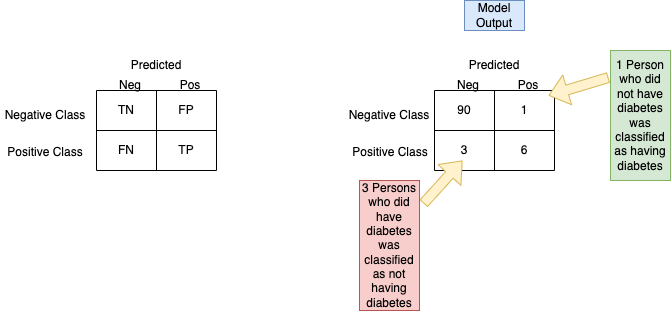

- **Accuracy**: We have over 96% accuracy! This is simply because less than 5% of our data is actually diabetic persons.
- **Precision:** When it predicts yes, how often is it correct? TP/predicted yes = 6/7 = 0.857
- **Recall**: When it's actually yes, how often does it predict yes? TP/actual yes = 6/9 = 0.666
- **F1-Score**: The harmonic mean of precision and recall - 2 * ((precision * recall) / (precision + recall)) = 0.75
- The higher the F1 score the better, with 0 being the worst possible and 1 being the best.
- In this case we might be more concerned with Recall as opposed to Precision.
- We may also want to increase the penalty for FN since they are more detrimental than a FP.
- https://link.springer.com/chapter/10.1007/978-3-030-36178-5_4
- Some material referenced from: https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/

### Topic Modelling

Topic modeling is an unsupervised machine learning technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents.

Non Negative Matrix Factorization (NMF), Latent Dirichlet Allocation (LDA) and Single Value Decomposition (SVD) algorithms will be used to find topics in a document collection. The output of the derived topics involved assigning a numeric label to the topic and printing out the top words in a topic.

The algorithms are not able to automatically determine the number of topics and this value must be set when running the algorithm. Comprehensive documentation on available parameters is available for both [NMF](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html), [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation) and [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).

- https://medium.com/analytics-vidhya/topic-modeling-with-non-negative-matrix-factorization-nmf-3caf3a6bb6da
- https://www.analyticsvidhya.com/blog/2021/06/part-18-step-by-step-guide-to-master-nlp-topic-modelling-using-lda-probabilistic-approach/
- https://towardsdatascience.com/latent-semantic-analysis-distributional-semantics-in-nlp-ea84bf686b50

In [19]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\n")
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(documents[doc_index])
            print("\n")

In [20]:
documents = list(X)[0:10000]
print(len(documents))

10000


In [21]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

In [22]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names_out()

In [23]:
no_topics = 5

In [24]:
# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

In [25]:
no_top_words = 10
no_top_documents = 4
print("NMF Topics \n\n")
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)

NMF Topics 


Topic 0:
like taste good product great flavor just chocolate really love


To me, it' tastes more like chocolate milk. I really like the product and I think there are better flavors out there.


I read all the positive reviews and thought I'd give it try. First of all it tasted stale.  Secondly I had to use 5 spoonfuls just to get any taste and then it didn't taste like the chocolate. It tasted more like Olvatine.  For the young people out there, Ovaltine was drink in the 50's, Which I didn't like any better. We all have different tastes.  For my part I won't be ordering this again.  UPDATE: I bought the Milk chocolate at the same time and decided to try that.  It was delicious.  I can't explain the difference but I'd recommend the Milk Chocolate just stay away from the one with the marshmallows.


I love this stuff. It's not your regular milk chocolate hot cocoa, but if you like trying different flavors of cocoa, you should give this a try.  To me it tastes like dark cho

In [26]:
# Run LDA
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

In [27]:
print("\n\nLDA Topics \n\n")
display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)



LDA Topics 


Topic 0:
food br dog dogs treats cat eat cats just chicken


This review will make me sound really stupid, but whatever. I don't really care as long as people find out what's real and can avoid my mistakes.<br /><br />I got my wonderful little sweet Bella Bean when she was a few days shy of three years old. She had been bounced around from house to house and eating whatever was cheap. I have had cats around me my entire life, for about twenty-five years now. My mother always just fed them whatever, the kinds of food you buy in the supermarket - Friskies, Nine Lives, Kit & Kaboodle, stuff like that. And our cats were always fine, at least in terms of their eating habits. They would eat in the morning, stop when they were done, come back, and eat some more when they got hungry.<br /><br />My housemate at the time was working for Hill's and assured me that this was the best food ever made, so great, so on and so forth. I now know that she is an utter buffoon, but I initial

In [28]:
#SVD
lsi_model = TruncatedSVD(n_components=no_topics, n_iter=7, random_state=42).fit(tf)
lsi_W = lsi_model.transform(tf)
lsi_H = lsi_model.components_

In [29]:
print("\n\nLSI Topics \n\n")
display_topics(lsi_H, lsi_W, tf_feature_names, documents, no_top_words, no_top_documents)



LSI Topics 


Topic 0:
br like food product just good taste flavor really amazon


[...]<br />Recall -- Firm Press Release<br /><br />FDA posts press releases and other notices of recalls and market withdrawals from the firms involved as a service to consumers, the media, and other interested parties. FDA does not endorse either the product or the company.<br />Creative Energy Foods, Inc. Recalls Crunch® thinkThin Nutrition Bars Due to Possible Health Risk Associated With Sunland Inc. Peanut Products<br /><br />Contact:<br />Consumer:<br />510-567-1200<br /><br />FOR IMMEDIATE RELEASE - October 12, 2012 - Creative Energy Foods, Inc. (CEF) is voluntarily recalling Crunch® thinkThin nutrition bars which may contain blanched roasted peanuts supplied by Sunland , Inc. to CEF. The decision was made as the result of the expanded recall of peanut butter, nut butters and peanut products by Sunland because of potential contamination with Salmonella.<br /><br />Salmonella bacteria can cause se

### WordCloud

In [31]:
# ! pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [32]:
def print_cloud(data):
    text = " ".join(review for review in data)
    print ("There are {} words in the combination of all reviews.".format(len(text)))
    stopwords_set = set(stopwords.words('english'))
    wordcloud = WordCloud(stopwords=stopwords_set, background_color="white").generate(text)
    return wordcloud

There are 74300872 words in the combination of all reviews.


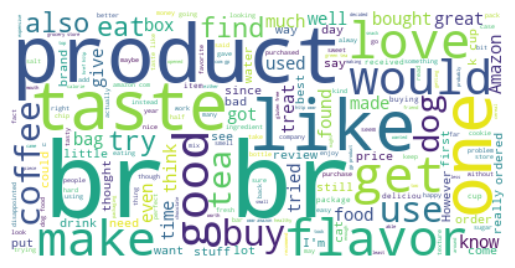

In [33]:
wordcloud = print_cloud(df['Text'])
fig = plt.figure(1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig("word1.png", dpi=300)